## 추가 내용! 
### 인코딩 관련! 
#### 1. 왜 NAME 칼럼을 인코딩을 했는가? 
#### 그 이유는 머신러닝 모델에서 목표 변수, 즉 예측하려는 값을 숫자로 변환해야하기 때문! 
#### iris.csv columns를 보면 Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']) 이거인데 여기서 SepalLength, SepalWidth, PetalLength, PetalWidth → 꽃잎과 꽃받침의 길이/너비 (숫자형 데이터, 인코딩 불필요)
#### Name → 꽃의 품종 (setosa, versicolor, virginica → 범주형 데이터, 숫자로 변환 필요!)
#### 👉 즉, Name 컬럼이 클래스(Label) 역할을 하므로, 분류 모델을 학습시키기 위해 숫자로 변환(Label Encoding) 한 것입니다.


##### 2️⃣ 원-핫 인코딩(One-Hot Encoding)은 언제 사용할까?
##### ✅ 범주형 데이터가 숫자의 크기와 관계없는 경우 사용!

##### 💡 원-핫 인코딩이 필요한 경우
##### 서로 다른 범주 간 크기 비교가 의미 없을 때

##### 예: 'Red', 'Blue', 'Green' (색상은 크기 비교가 불가능)
##### Label Encoding → 'Red' = 0, 'Blue' = 1, 'Green' = 2
##### 이렇게 하면 Green > Blue > Red 처럼 순위 관계가 생겨버림 → 원-핫 인코딩 필요!

#### 🌟 결론: Iris 데이터에서는 Label Encoding이 적절!
#### Name(꽃의 품종)이 범주형 데이터라서 숫자로 변환해야 함
#### setosa, versicolor, virginica는 3개뿐이므로 Label Encoding이 효율적
#### 범주 간 순위(서열 관계)가 없지만, 트리 기반 모델도 사용할 거라 Label Encoding이 문제되지 않음
#### 👉 하지만 SVM이나 로지스틱 회귀를 단독으로 사용한다면 원-핫 인코딩이 더 적절할 수도 있음!
#### ✔️ 데이터와 모델에 따라 다르게 선택하면 된다! 😊

### 그리고 범주형 데이터는 문자열을 의미 ! 

Missing values:
 SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64
Label distribution before encoding:
 Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Label distribution after encoding:
 Name
0    50
1    50
2    50
Name: count, dtype: int64
Random Forest Accuracy: 1.0000
Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Decision Tree Accuracy: 1.0000
Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Logistic Regression Accuracy: 1.0000
Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

KNN Accuracy: 1.0000
KNN Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM Accuracy: 1.0000
SVM Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



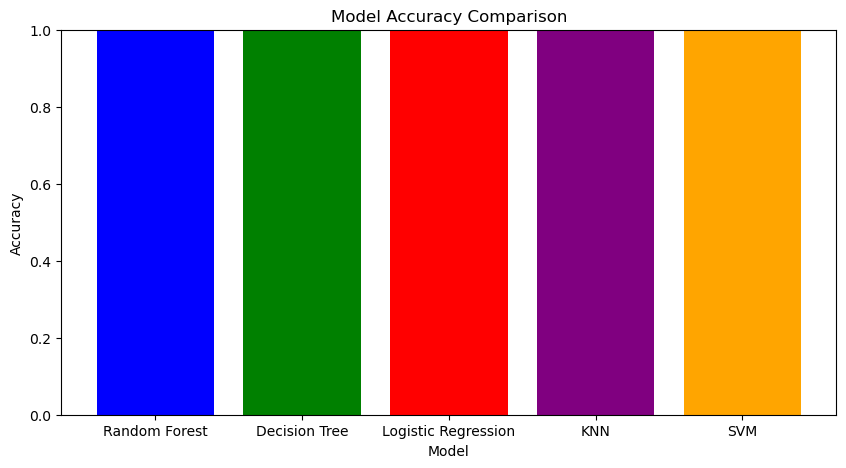

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. 데이터 로딩
file_path = "C:/Users/min22/Desktop/Artifical intelligence/iris.csv"
df = pd.read_csv(file_path)

# 2. 결측치 확인
print("Missing values:\n", df.isnull().sum())

# 4. 레이블 확인 (Name 컬럼이 실제 레이블 컬럼)
print("Label distribution before encoding:\n", df['Name'].value_counts())

# 6. 엔코딩 (Name 컬럼을 숫자로 변환)
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
print("Label distribution after encoding:\n", df['Name'].value_counts())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop(columns=['Name'])
y = df['Name']

# 데이터 분할 (학습 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분류 모델 리스트
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {'accuracy': acc, 'confusion_matrix': cm}
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Confusion Matrix:\n{cm}\n")

# 결과 시각화
plt.figure(figsize=(10, 5))
accuracies = [results[model]['accuracy'] for model in models]
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

In [5]:
print(df_iris.columns)


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')
